In [1]:
from data import Data
from feature_importance import FeatureImportance
from dimension_reduction import display_umap_2d_plot, PCADimensionReduction, display_tsne_2d_plot
from kmeans_clustering import KMeansClustering
from utils import *

In [3]:
data_filepath = "data/SC_integration/counts_ctc_simulated_123_5k.tsv"
true_results_filepath = "data/SC_integration/ids_ctc_simulated_123_5k.tsv"
train_indices_filepath = "data/SC_integration/train_indices.npy"
test_indices_filepath = "data/SC_integration/test_indices.npy"
SEED = 42

data_object = Data(data_filepath, true_results_filepath)
train_data, test_data, train_true_results, test_true_results =  data_object.load_train_test_split(train_indices_filepath, test_indices_filepath)
scaled_train_data, scaled_test_data = data_object.get_scaled_train_test_data()

## Najważniejsze zmienne

C:\Users\martae\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy: 0.996096291476903
Test accuracy: 0.9916540212443096
Train confusion matrix:
[[3027   12]
 [   0   35]]
Precision: 0.7446808510638298
Recall: 1.0
Test confusion matrix:
[[1298    5]
 [   6    9]]
Precision: 0.6428571428571429
Recall: 0.6
Number of genes that matter: 43 out of 2000  (2.15%)


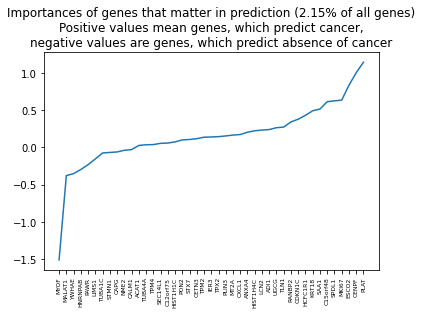

In [4]:
converted_train_data, converted_test_data, converted_train_true_results, converted_test_true_results = data_object.get_converted_train_test_split()
columns = train_data.columns.values.tolist()
feature_importance_object = FeatureImportance(converted_train_data, converted_test_data, converted_train_true_results, converted_test_true_results, columns)
feature_importance_object.logistic_regression_coefficients_importance()

Widzimy, że tylko niewielka część genów będzie służyła do określenia, czy dany materiał generyczny należy do komórki raka. Poza tym na wykresie widać, że jest więcej genów śwadczących o obecności raka, niż genów, które mogłyby służyć do predykcji jego nieobecności.

## PCA

PCA - principal component analysis is about creating lines in multidimensional space, that take into account which variable differ the samples the most. PCA lines (called PC) also correspond to some percentage of total data variation and coefficients of these lines to concrete variables. The bar plot that shows this variation percentage is called scree plot.

Below we see scree plots for some amount of PC lines. The first line (PC1) for unscaled data has about 14% of total variation, which seems to be a little. We see that only a few PCA lines have significant percentage of total variation for unscaled data.

In case of scaled data PC1 is responsible for about 3% of total variation and the variation is more spread out across all lines.

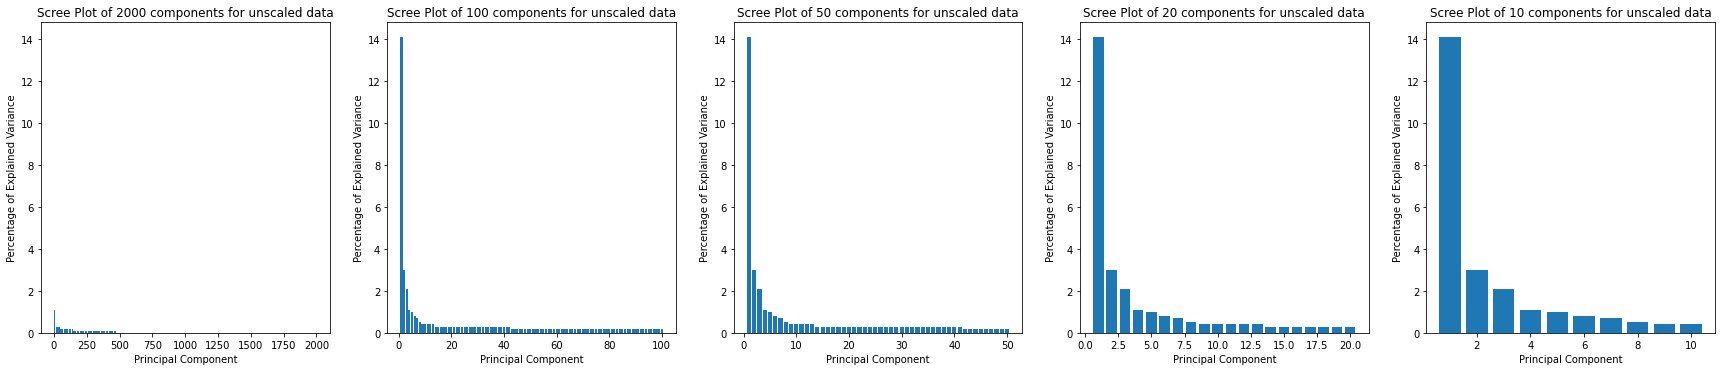

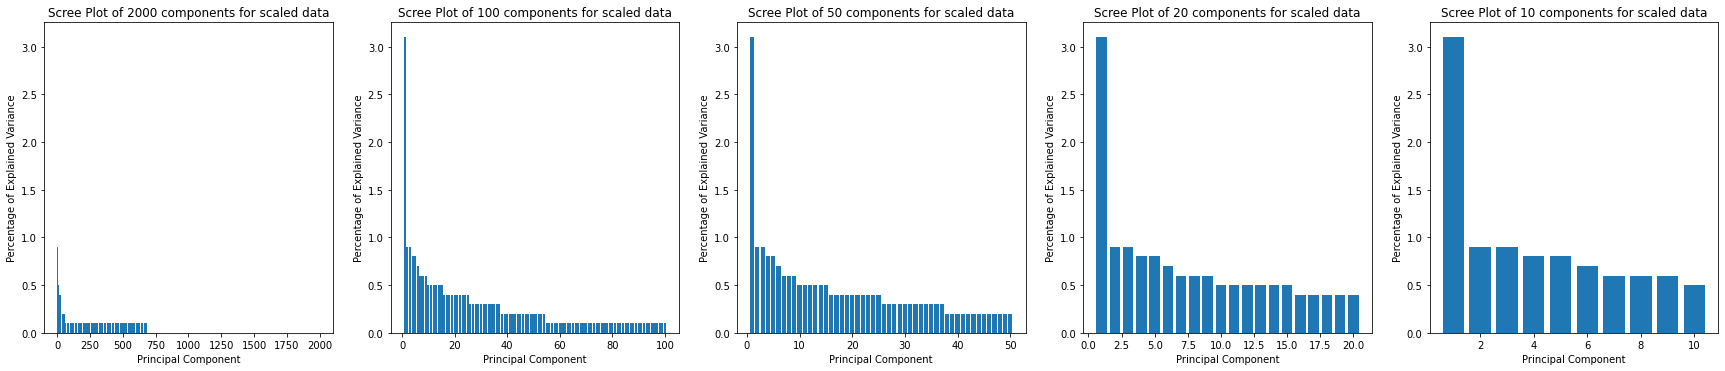

In [5]:
pca_object = PCADimensionReduction(train_data, scaled_train_data, train_true_results, SEED)
components_amounts_list = [2000, 100, 50, 20, 10]
pca_object.generate_scree_plots(components_amounts_list)

Here we take only 2 PCs, which are responsible for about 17% of total variation, which is not much and the plot should be considered as noisy. We see that there are 3 large groups of cells and the CTC cells let's say outliers of these groups. Moreover, CTC cells differ mostly in PC1.

Additionally, in case of scaled data we can see that CTC cells are better separated than with unscaled data, which is very interested.

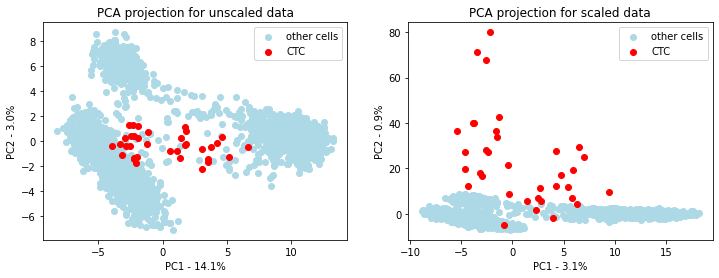

In [6]:
pca_object.display_pc1_pc2_plot()

Here we have the biggest loading scores for PC1 - they are coefficients of unit vector of the PC1 line, so in some way coefficient of PC1. Variables with the biggest loading scores should differ samples the most.

In [7]:
top_variables = pca_object.get_most_important_variables_from_pc1(10)
top_variables

S100A9     0.239765
CST3       0.217977
CTSS       0.187347
LST1       0.180377
LGALS1     0.177783
S100A4     0.154780
FTL        0.148237
S100A6     0.147649
S100A11    0.145217
SAT1       0.142339
dtype: float64

## UMAP

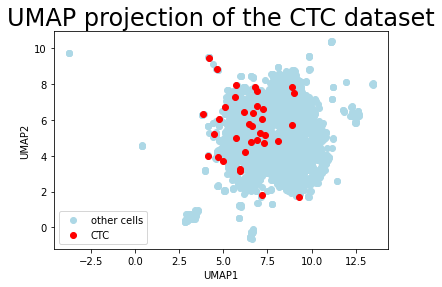

In [7]:
display_umap_2d_plot(scaled_train_data, train_true_results, SEED)

## TSNE

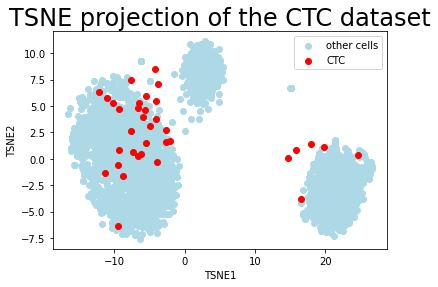

In [8]:
display_tsne_2d_plot(train_data, train_true_results, SEED)

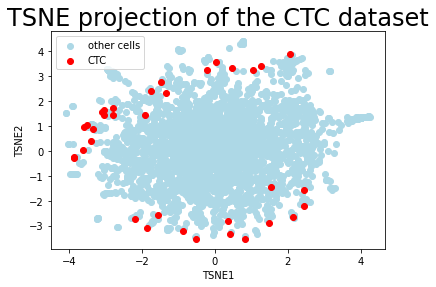

In [9]:
display_tsne_2d_plot(scaled_train_data, train_true_results, SEED)

## K-means CLustering

Here we have plots that show how good is clustering of CTC subset. Our goal is to have all CTC cells in one cluster. Firstly we checked raw data, then data of first 20 PCs and first 20 genes of PC1. In general clustering is not so good - at most 70-80% of CTC were gathered to 1 cluster. In addition, in CTC subset there were distinguished at most about 10 different clusters.

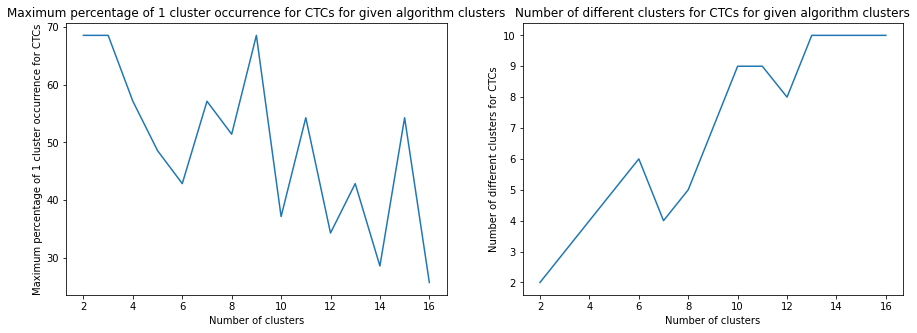

In [10]:
k_array = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
k_means_object = KMeansClustering(train_true_results, SEED)
k_means_object.k_means_clustering_for_different_k(scaled_train_data, k_array)

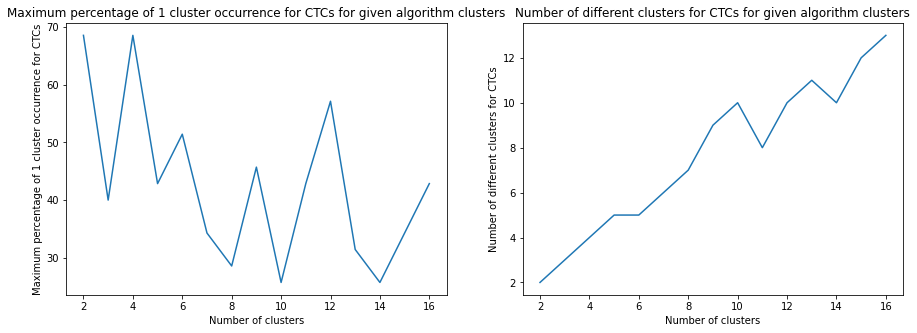

In [11]:
k_means_object.k_means_clustering_for_different_k(scaled_train_data, k_array, pca=20)

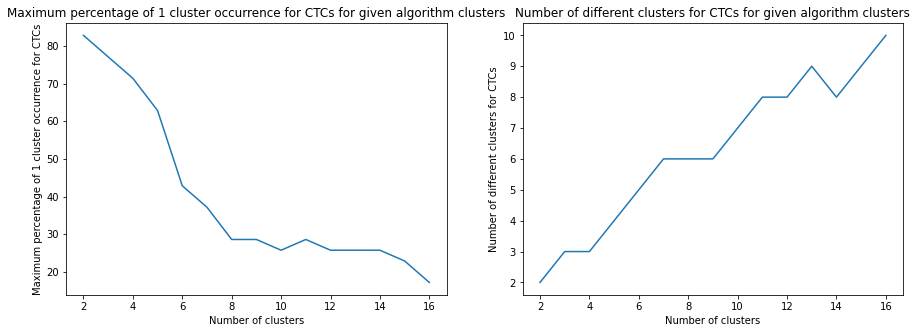

In [12]:
pc1_top_variables = pca_object.get_most_important_variables_from_pc1(20)
k_means_object.k_means_clustering_for_different_k(scaled_train_data[pc1_top_variables.index], k_array)

Here we have 2D PCA clustering. The dots with red edges are CTC cells. We can see that some of CTC cells are different from other cells and they have separate clusters, but there are also some CTC cells, that are similar to rest of the cells.

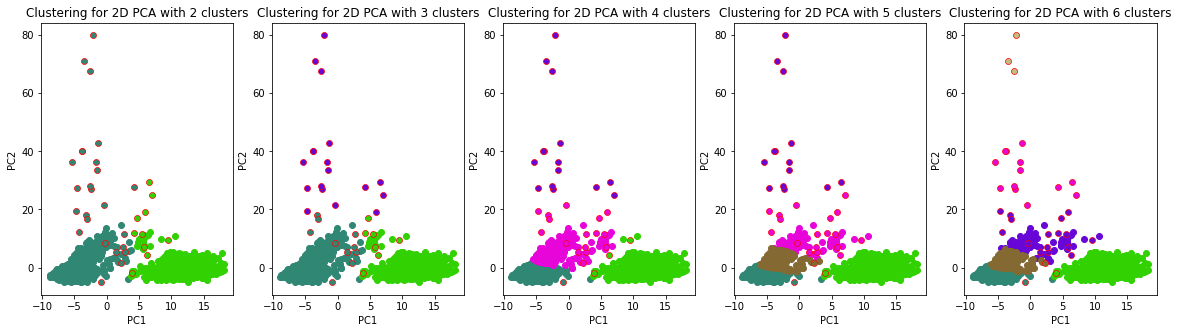

In [13]:
k_means_object.display_2d_pca_clustering(scaled_train_data, [2,3,4,5,6])

## Dendrogram

diagram w kształcie drzewa ukazujący związki pomiędzy wybranymi elementami na podstawie przyjętego kryterium.
Dendrogram można wykorzystać do określenia liczby klastrów na które można podzielić dane.


Dostępne kryteria przy łączeniu klastrów:
'ward'     - minimalizuje wariancję łączonych klastrów;
'average'  - maksymalizuje średni dystans pomiędzy punktami w różnych klastrach;
'complete' - minimalizuje maksymalną odległość między punktami w klastrach;
'single'   - maksymalizuje najmniejszą odległość między punktami w klastrach;

Paramatr p - ilość klastrów



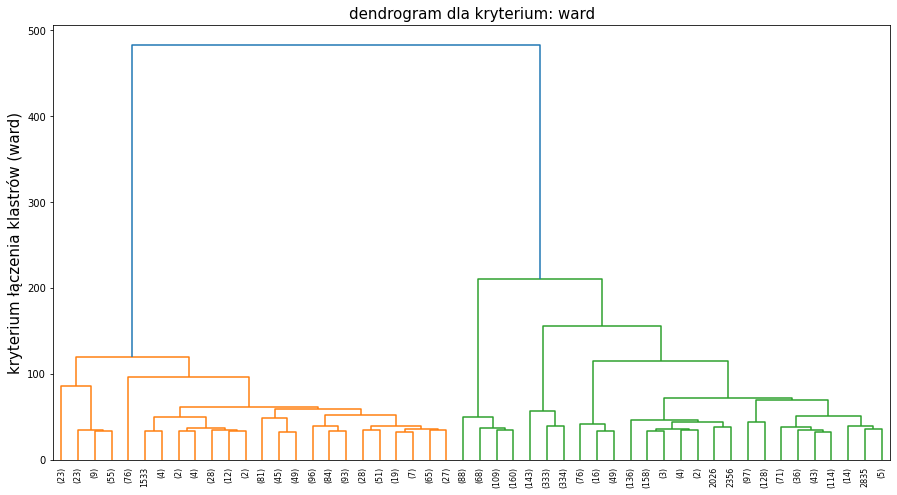

In [4]:
# dla surowych danych
draw_dendrogram(train_data, 'ward', 50)

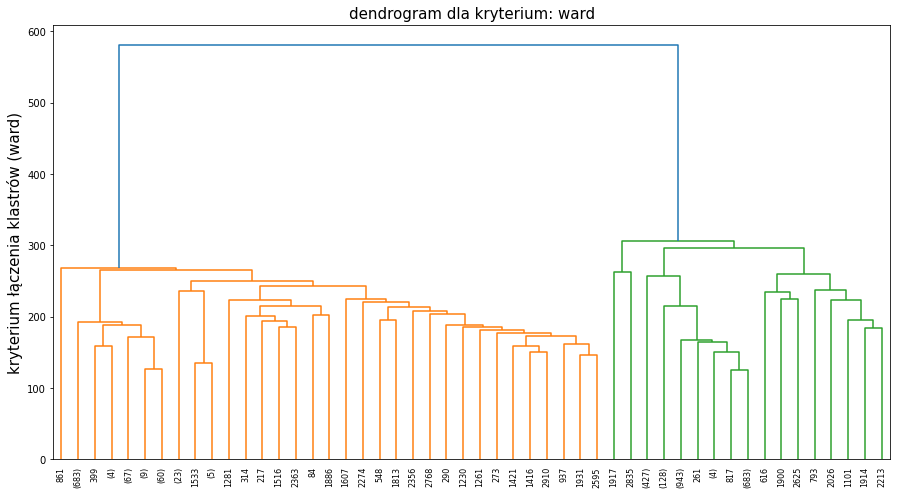

In [5]:
# dla przeskalowanych danych
draw_dendrogram(scaled_train_data, 'ward', 50)

## Heatmap

/home/melehean/Important_Stuff/Studies/GUMED/ctc-env/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


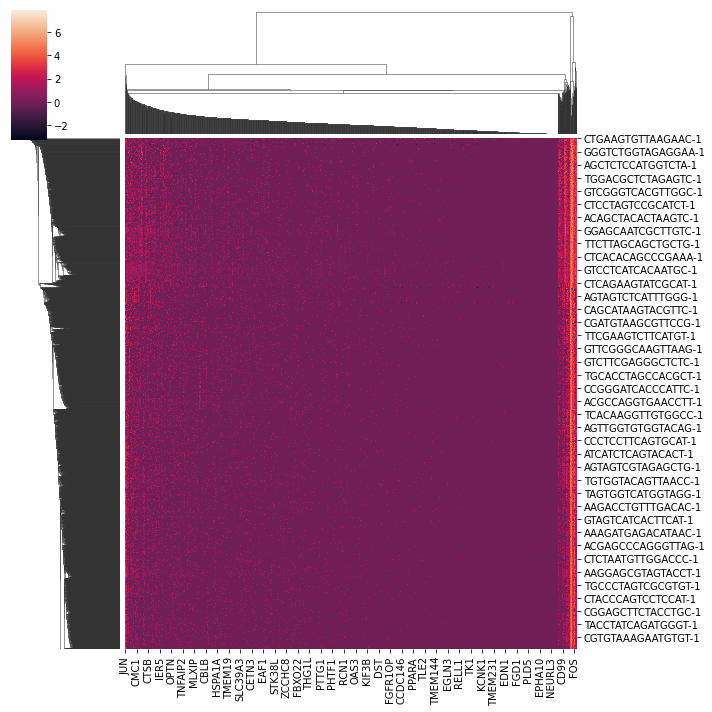

In [4]:
draw_heatmap(train_data)

## Standard deviation

In [11]:
print("Standard deviation of train data: ")
train_data.std()

Standard deviation of train data: 


CXCL8     0.843094
VIM       1.112183
LCN2      0.122643
IL1B      0.717186
S100A4    1.415984
            ...   
STC1      0.018960
MFAP3L    0.041712
RPL27A    0.433564
MACF1     0.589687
SPC24     0.059292
Length: 2000, dtype: float64

In [12]:
train_data.std().sort_values(ascending=False).head(50)

S100A9      1.822611
CST3        1.575841
CD74        1.464026
S100A4      1.415984
CTSS        1.412923
LGALS1      1.365923
IL32        1.341124
LST1        1.316252
HLA-DQB1    1.292581
LTB         1.283341
NEAT1       1.257947
SAT1        1.250441
S100A6      1.248029
S100A11     1.198023
SRGN        1.179840
COTL1       1.167849
PSAP        1.156043
JUN         1.140575
VIM         1.112183
FOS         1.110905
FTL         1.105047
GSTP1       1.102046
ANXA1       1.095038
TYMP        1.082723
LDHB        1.061145
S100A10     1.057811
NFKBIA      1.052101
CD69        1.050758
KLF6        1.031112
IER2        1.026899
NPC2        1.026607
JUNB        1.021482
AP1S2       1.019466
RGS2        1.012462
ITGB2       1.006490
GAPDH       1.003857
VCAN        0.984469
IFITM2      0.982558
PLAC8       0.980796
CYBA        0.970030
ID2         0.967451
FOSB        0.951139
GRN         0.948791
ARPC1B      0.948426
CALM1       0.945963
STXBP2      0.942382
ANXA2       0.937793
HLA-DMA     0

In [13]:
print("Standard Deviation of scaled train data")
scaled_train_data.std()

Standard Deviation of scaled train data


CXCL8     1.000163
VIM       1.000163
LCN2      1.000163
IL1B      1.000163
S100A4    1.000163
            ...   
STC1      1.000163
MFAP3L    1.000163
RPL27A    1.000163
MACF1     1.000163
SPC24     1.000163
Length: 2000, dtype: float64

## Histograms

In [14]:
def plot_histogram(data_to_plot, variable):
    plt.figure(figsize=(12, 8))
    data_to_plot[variable].plot.hist(bins=10, alpha=0.5)

    plt.title(f'Histogram for {variable}', fontsize=15)
    plt.legend(loc=2, prop={'size': 6})
    plt.show()

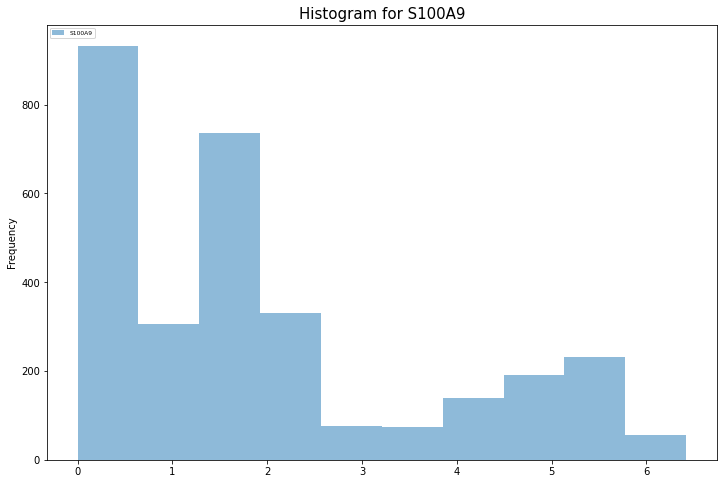

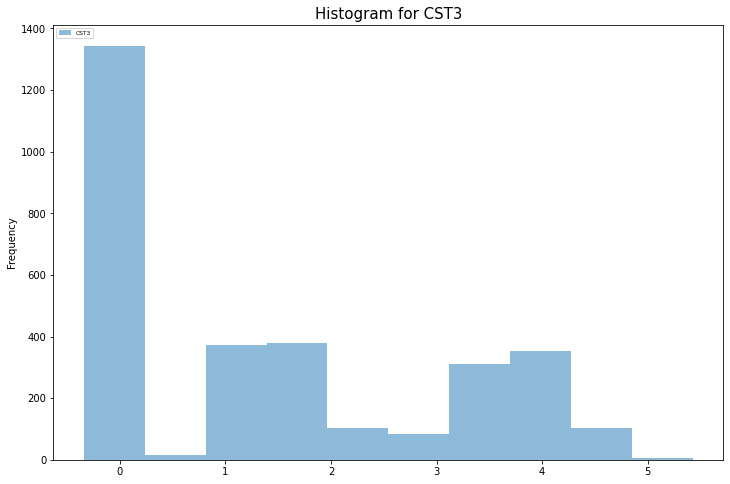

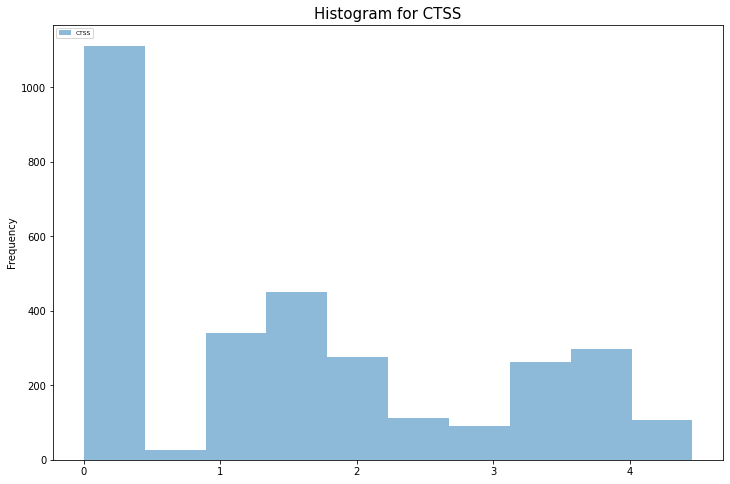

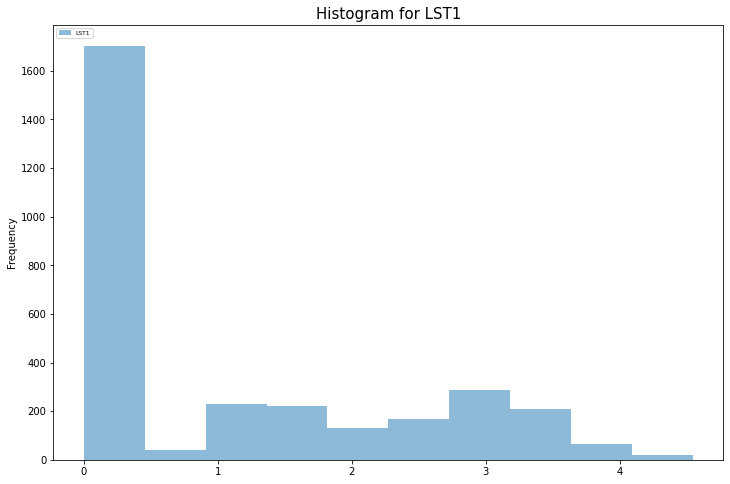

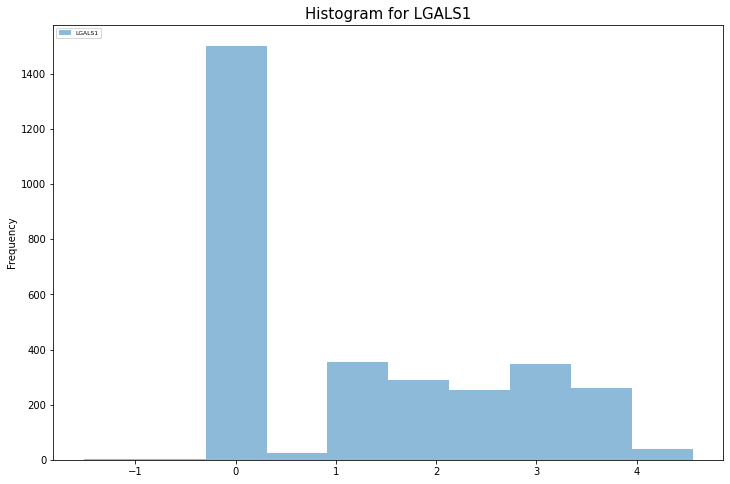

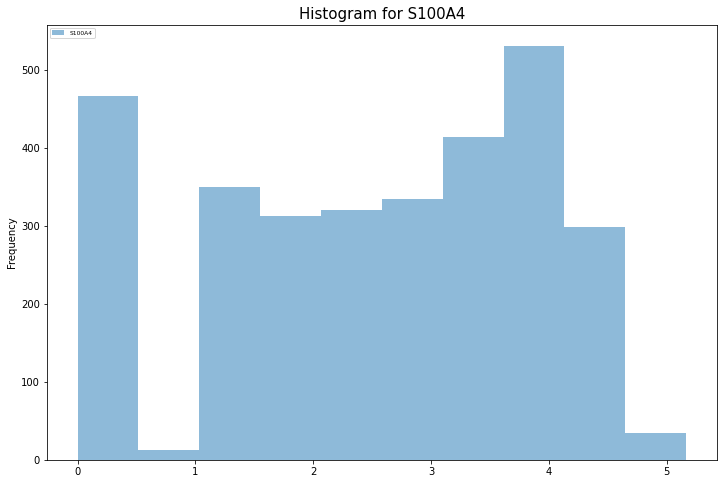

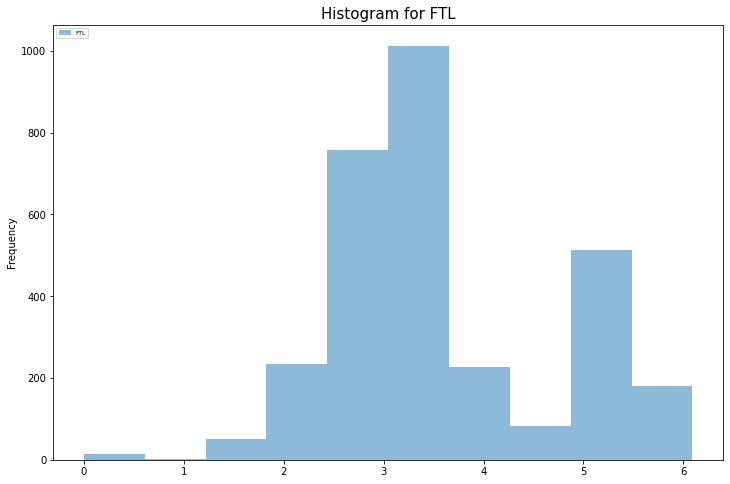

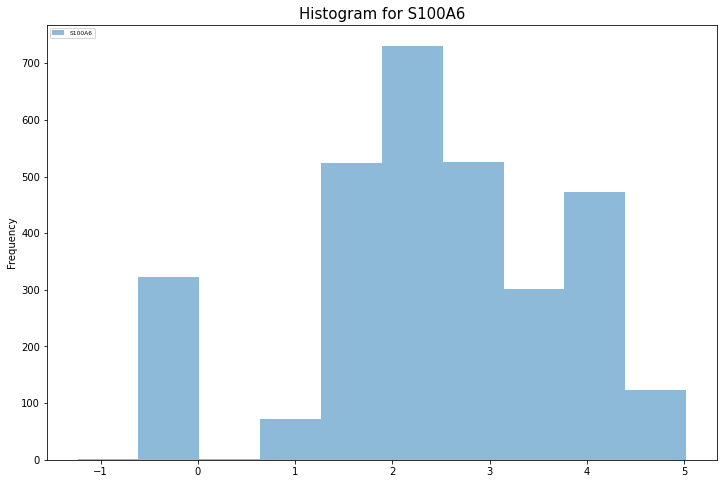

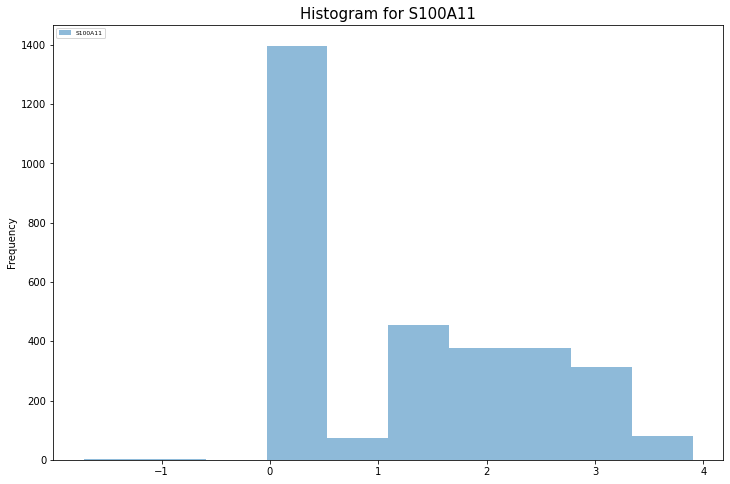

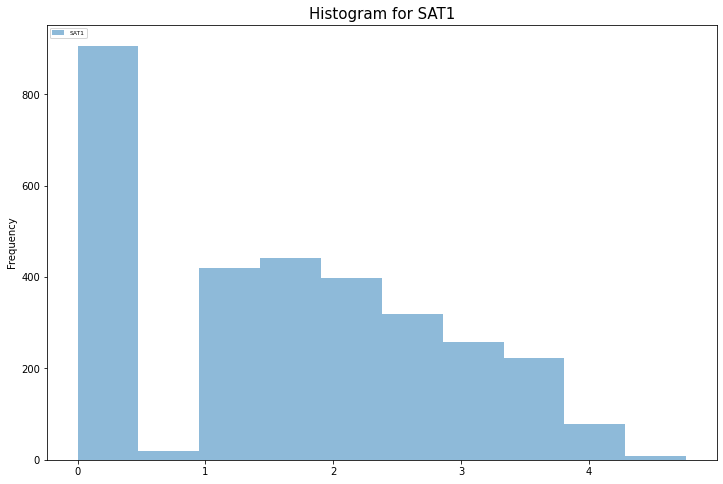

In [15]:
# variables to plot, can be changed
variables = ['S100A9', 'CST3', 'CTSS', 'LST1', 'LGALS1', 'S100A4', 'FTL', 'S100A6', 'S100A11', 'SAT1']

for var in variables:
    plot_histogram(train_data, var)

## CTC vs Other Cells Statistics

In [4]:
statistics = calculate_statistics(train_data, train_true_results)
statistics.head(20)

,ctc_variance,other_cells_variance,ctc_mean,other_cells_mean,ctc_std,other_cells_std,variance_check,t_test,p_values
PSME2,0.769496,0.725528,0.804979,0.804905,0.877209,0.851779,True,0.000512,0.999591
MGST2,0.263379,0.204424,0.162091,0.162150,0.513205,0.452133,True,0.000759,0.999395
GSTP1,1.139257,1.214973,1.190886,1.191055,1.067360,1.102258,True,0.000901,0.999281
ZCCHC2,0.122173,0.048367,0.035590,0.035552,0.349532,0.219926,True,0.000995,0.999206
LY6E,0.597266,0.789755,0.906722,0.906514,0.772830,0.888682,True,0.001383,0.998896
MYRF,0.070462,0.000540,0.000349,0.000422,0.265448,0.023240,False,0.001593,0.998738
APP,0.540534,0.189257,0.143470,0.143317,0.735210,0.435037,True,0.002046,0.998368
BIRC3,0.175593,0.444380,0.355232,0.354969,0.419039,0.666619,True,0.002331,0.998140
RGS19,0.144506,0.475666,0.438661,0.439091,0.380140,0.689685,True,0.003685,0.997060
PDZK1IP1,0.298742,0.002156,0.001815,0.001310,0.546573,0.046431,False,0.005384,0.995736
